In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv('insurance.csv')
insurance.sample(10)

,age,sex,bmi,children,smoker,region,charges
431,29,female,20.235,2,no,northwest,4906.40965
654,59,female,35.200,0,no,southeast,12244.53100
524,42,male,26.070,1,yes,southeast,38245.59327
649,58,female,32.965,0,no,northeast,12430.95335
613,34,female,19.000,3,no,northeast,6753.03800
584,19,male,20.700,0,no,southwest,1242.81600
928,62,female,39.160,0,no,southeast,13470.80440
294,25,male,26.800,3,no,southwest,3906.12700
647,40,female,23.370,3,no,northeast,8252.28430
321,26,female,29.640,4,no,northeast,24671.66334


In [3]:
insurance.shape

(1338, 7)

In [4]:
insurance_corr = insurance.corr()
insurance_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


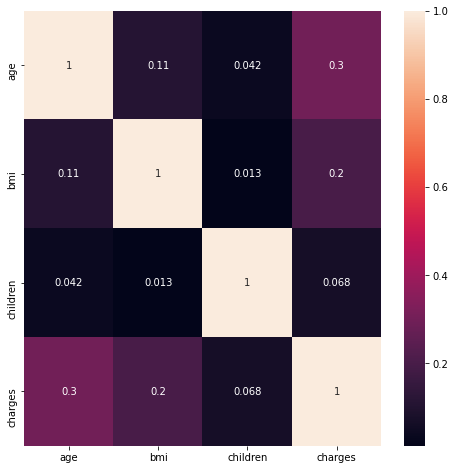

In [5]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (8,8))
sns.heatmap(insurance_corr, annot= True)

In [6]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

In [7]:
insurance['region'] = label_encoding.fit_transform(insurance['region'].astype(str))
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,3,16884.92400
1,18,male,33.770,1,no,2,1725.55230
2,28,male,33.000,3,no,2,4449.46200
3,33,male,22.705,0,no,1,21984.47061
4,32,male,28.880,0,no,1,3866.85520


In [8]:
label_encoding.classes_

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [9]:
insurance = pd.get_dummies(insurance, columns=['sex', 'smoker'])
insurance.sample(10)

,age,bmi,children,region,charges,sex_female,sex_male,smoker_no,smoker_yes
189,29,32.110,2,1,4922.91590,1,0,1,0
288,59,36.765,1,0,47896.79135,1,0,0,1
145,29,38.830,3,2,5138.25670,1,0,1,0
1276,22,30.400,0,0,2741.94800,1,0,1,0
526,19,30.590,2,1,24059.68019,1,0,1,0
310,50,26.600,0,3,8444.47400,0,1,1,0
789,62,29.920,0,2,13457.96080,1,0,1,0
1021,22,31.020,3,2,35595.58980,1,0,0,1
454,32,46.530,2,2,4686.38870,0,1,1,0
292,25,45.540,2,2,42112.23560,0,1,0,1


In [11]:
insurance.to_csv('dataset/insurance_processed.csv', index= False)

In [14]:
insure = pd.read_csv('dataset/insurance_processed.csv')
insure.head()

,age,bmi,children,region,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,3,16884.92400,1,0,0,1
1,18,33.770,1,2,1725.55230,0,1,1,0
2,28,33.000,3,2,4449.46200,0,1,1,0
3,33,22.705,0,1,21984.47061,0,1,1,0
4,32,28.880,0,1,3866.85520,0,1,1,0


In [16]:
X = insure.drop('charges', axis= 1)
Y = insure['charges']

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2)

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [25]:
bag_reg = BaggingRegressor(
                    DecisionTreeRegressor(),
                    n_estimators= 500,
                    bootstrap= True, #sampling with replacement
                    max_samples= 0.8, #sample 80% of the training data
                    n_jobs= -1, #trained in parallel
                    oob_score= True) #evaluate on out-of -bag instances for each predictor

bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=T

In [27]:
#r2 score of the ensemble evaluated on out-of -bag instances

bag_reg.oob_score_

0.8231552249055795

In [29]:
from sklearn.metrics import r2_score

y_pred = bag_reg.predict(x_test)

r2_score(y_test, y_pred)

0.8935671193965412

In [31]:
#pasting method

bag_reg = BaggingRegressor(
                    DecisionTreeRegressor(),
                    n_estimators= 500,
                    bootstrap= False, #sampling without replacement (pasting)
                    max_samples= 0.9, #sample 90% of the training data
                    n_jobs= -1, #trained in parallel
                    )

bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=F

In [32]:
y_pred = bag_reg.predict(x_test)

r2_score(y_test, y_pred)

0.8579550106659579